# Sales commissions forecast

## Try me
 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/Simulation/Solved/Sales%20commissions%20forecast.ipynb)[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FSimulation%2FSolved%2FSales%20commissions%20forecast.ipynb)

## Problem Definition
A company with 5 sales managers wants to provision budget to pay sales commissions to sales managers. The company applies a commission rate based on the percentage of target sales obtained, given by the following table:

| Sales / Target ratio 	| Commission Rate 	|
|----------------------	|-----------------	|
| 0-90 %               	| 2%              	|
| 90-100%               | 3%              	|
| >= 100%              	| 4%              	|


Each salesman will be compensanted with the commission rate times the total sales obtained. The following table shows the target sales for the five sales managers:

| Sales Manager 	| Sales Target (€) 	|
|---------------	|------------------	|
| 1             	| 100,000          	|
| 2             	| 200,000          	|
| 3             	| 75,000           	|
| 4             	| 400,000          	|
| 5             	| 500,000          	|



**a)** Estimate the budget for sales commissions the company has to pay in the scenario where all sales managers get exactly the 100% of the sales target (naive approach).

**b)** The company has a historic record of sales for the five sales managers and from this record, it can estimate that the Percent to Plan (The ratio between the actual sales and the sales target) can be modelled by a normal distribution with a mean of 100% and standard deviation of 10%. Use this insight to estimate the budget for sales commissions using a MonteCarlo distribution. 

## Solution
**a)** In the requested scenario, the sales obtained by each sales manager are represented in the table below:


| Sales Manager 	| Sales Target (€) 	| Actual Sales (€) 	| Percent to Plan (%) 	| Commission Rate (€) 	| Commission Amount (€) 	|
|---------------	|------------------	|------------------	|---------------------	|---------------------	|-----------------------	|
| 1             	| 100,000          	| 100,000          	| 100                 	| 4                   	| 4,000                 	|
| 2             	| 200,000          	| 200,000          	| 100                 	| 4                   	| 8,000                 	|
| 3             	| 75,000           	| 75,000           	| 100                 	| 4                   	| 3,000                 	|
| 4             	| 400,000          	| 400,000          	| 100                 	| 4                   	| 16,000                	|
| 5             	| 500,000          	| 500,000          	| 100                 	| 4                   	| 20,000                	|

The total budget for sales commission can be obtained with the summation of the last column (51,000€)

**b)** In order to estimate the budget using Montecarlo, we are going to use the Python numpy package to calculate the probability distribution.

First we import the libraries we are going to use:

In [45]:

import pandas as pd
import numpy as np


Then we initialise the data needed to model the problem

In [46]:

avg = 1
std_dev = .1
num_simulations = 1000

sales_target_values = np.array([100000, 200000, 75000, 400000, 500000])

# Define a function to calculate the commission rate depending on the rate to target
def calc_com_rate(x):
    if x <= 0.9:
        return 0.02
    elif x <= 1:
        return 0.03
    else:
        return 0.04
    
# You can also use a lambda:
# calc_com_rate = lambda x: 0.02 if x <= 0.9 else 0.03 if x <= 0.99 else 0.04 

# Vectorize the function so that we can apply it to vectors and matrices
v_calc_com_rate = np.vectorize(calc_com_rate)

# Define a list to keep all the results from each simulation that we want to analyze
all_stats = np.zeros((num_simulations, 3))





Now we run the simulations in a for loop:

In [47]:
# Loop through simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    pct_to_target = np.random.normal(avg, std_dev, len(sales_target_values))

    #Calculate actual sales
    sales = pct_to_target*sales_target_values
    
    # Determine the commissions rate and calculate it
    commission_rate = v_calc_com_rate(np.array(pct_to_target))

    # Calculate the commission
    commission = sales*commission_rate
    
    # We want to track sales,commission amounts and sales targets over all the simulations
    # Sum values among sales managers and calculate the mean commission rate
    all_stats[i,:] = [np.sum(sales),
                      np.sum(commission),
                      np.mean(commission_rate)]


results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Commission_Rate'])

Finally, we represent the results and calculate the confidence interval:

In [48]:
results_df.describe()

,Sales,Commission_Amount,Commission_Rate
count,1.000000e+03,1000.000000,1000.000000
mean,1.275014e+06,44052.103207,0.033898
std,6.787145e+04,6867.089676,0.003249
min,1.074120e+06,23942.116488,0.024000
25%,1.229842e+06,39561.533879,0.032000
50%,1.275006e+06,44543.493621,0.034000
75%,1.317589e+06,49169.062538,0.036000
max,1.478058e+06,58539.162650,0.040000


c:\users\ffraile\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\ffraile\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\ffraile\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout

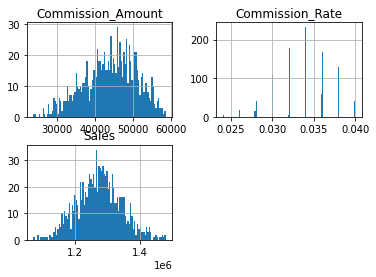

In [49]:
hist = results_df.hist(bins=100)

In [50]:
import scipy.stats as st
#Calculate the 95% confidence interval

# We collect the results from the data frame
a = np.array(results_df['Commission_Amount'])


# loc is used to center the distribution at mean of array
# scale is used to scale the distribution according to the standard error 
# of the mean (st.sem)
arr_standard_dev = np.std(a)/(len(a)**0.5)
arr_mean = np.mean(a)
interval = (st.norm.ppf(0.025, loc= arr_mean, scale=arr_standard_dev), st.norm.ppf(0.975, loc= arr_mean, scale=arr_standard_dev))

95% confidence interval is:  (43626.697262449656, 44477.5091506711)
or
(43626.697262449656, 44477.5091506711)


In [51]:
import pandas as pd
import numpy as np

avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

sales_target_values = np.array([100000, 200000, 75000, 400000, 500000])

# Define a lambda function to calculate the ratio
calc_com_rate = lambda x: 0.02 if x <= 0.9 else 0.03 if x <= 0.99 else 0.04 
v_calc_com_rate = np.vectorize(calc_com_rate)

# Choose random inputs for the sales targets and percent to target, 
# this time create a matrix with as many rows as simulations
pct_to_target = np.random.normal(avg, std_dev, (num_simulations, len(sales_target_values)))

# Reshape the sales target values into a matrix of adequate size
stv = np.broadcast_to(sales_target_values, (num_simulations, len(sales_target_values)))

# Calculate the sales applying the ratio
sales = pct_to_target*stv

# Calculate commission rate
commission_rate = v_calc_com_rate(pct_to_target)

# And commission
commission = sales*commission_rate

# Sum values among sales managers and calculate the mean commission rate
all_stats = [np.sum(sales, axis=1), np.sum(commission, axis=1), np.mean(commission_rate, axis=1)]

results_df = pd.DataFrame.from_records(np.transpose(all_stats), columns=['Sales',
                                                           'Commission_Amount',
                                                           'Commission_Rate'])

results_df.describe()


,Sales,Commission_Amount,Commission_Rate
count,1.000000e+03,1000.000000,1000.000000
mean,1.274653e+06,43849.666014,0.033772
std,6.770009e+04,6868.545178,0.003330
min,1.070847e+06,22201.173382,0.020000
25%,1.228111e+06,39223.966965,0.032000
50%,1.275056e+06,44283.089045,0.034000
75%,1.320497e+06,49146.611184,0.036000
max,1.469480e+06,58207.805777,0.040000
